## Figure 1

Figure 1 plots the following segments for the SMARP and SHARP data series:
* `magnetogram`, the line-of-sight magnetic field map
* `continuum`, the continuum intensity map
* `bitmap`, the activity map

In [1]:
import numpy as np
import matplotlib.pylab as plt
from astropy.io import fits
import sunpy.map
from sunpy.visualization.colormaps import color_tables as ct
import matplotlib.colors as colors
import drms
import astropy.units as u
import matplotlib.gridspec as gridspec
#%matplotlib inline
%config InlineBackend.figure_format='retina'

The first step in querying for the SMARP and SHARP data is to establish a connection to JSOC. This can be done with the Client() class. (Register to download data from JSOC [here](http://jsoc.stanford.edu/ajax/register_email.html)).

In [2]:
email='your@email.address' # Put in a registered e-mail address
c = drms.Client(debug=True, verbose=True, email=email)

http://jsoc.stanford.edu/cgi-bin/ajax/checkAddress.sh?address=mbobra%2540stanford.edu&checkonly=1


In [3]:
t_start = '2010.07.14_11:12:00'
duration = '12m'
harpnum = '86'
tarpnum = '13520'

Query the HMI data for the values of `t_start`, `duration`, and `harpnum` listed above.

If any of these exports fail, try exporting the data again (sometimes multiple times); an `HTTP Error 500: Internal Server Error` failure is likely due to a timeout error.

In [4]:
# Query the HMI data for this single T_REC
hmi_query_string = 'hmi.sharp_cea_720s['+harpnum+']['+t_start+'/'+duration+'][? (QUALITY<65536) ?]'

# Export the magnetogram as a FITS image
r = c.export(hmi_query_string+'{magnetogram}', protocol='fits', email=email)
fits_url_hmi = r.urls['url'][0]
hmi_map = sunpy.map.Map(fits_url_hmi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=series_struct&ds=hmi.sharp_cea_720s
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1390, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1390


In [5]:
# Export the magnetogram as a FITS image
r = c.export(hmi_query_string+'{continuum}', protocol='fits', email=email)
fits_url_hmi = r.urls['url'][0]
hmi_continuum = sunpy.map.Map(fits_url_hmi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bcontinuum%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1391, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1391


In [6]:
# Export the bitmap as a FITS file
r = c.export(hmi_query_string+'{bitmap}', protocol='fits', email=email)
fits_url_hmi = r.urls['url'][0]
hmi_bitmap = sunpy.map.Map(fits_url_hmi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bbitmap%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1392, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1392


In [7]:
# Export the confidence bitmap as a FITS file
r = c.export(hmi_query_string+'{conf_disambig}', protocol='fits', email=email)
fits_url_hmi = r.urls['url'][0]
hmi_conf_disambig = sunpy.map.Map(fits_url_hmi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=hmi.sharp_cea_720s%5B86%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C65536%29+%3F%5D%7Bconf_disambig%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=hmi.sharp_cea_720s.%7BHARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1393, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1393


Query the MDI data for the values of `t_start`, `duration`, and `tarpnum` listed above.

In [8]:
# Query the MDI data for this single T_REC
mdi_query_string = 'mdi.smarp_cea_96m['+tarpnum+']['+t_start+'/'+duration+'][? (QUALITY<262144) ?]'

# Export the magnetogram as a FITS image
r = c.export(mdi_query_string+'{magnetogram}', protocol='fits', email=email)
fits_url_mdi = r.urls['url'][0]
mdi_map = sunpy.map.Map(fits_url_mdi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?op=series_struct&ds=mdi.smarp_cea_96m
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D%7Bmagnetogram%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=mdi.smarp_cea_96m.%7BTARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1394_X_IN, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1394_X_IN


In [9]:
# Export the magnetogram as a FITS image
r = c.export(mdi_query_string+'{continuum}', protocol='fits', email=email)
fits_url_mdi = r.urls['url'][0]
mdi_continuum = sunpy.map.Map(fits_url_mdi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D%7Bcontinuum%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=mdi.smarp_cea_96m.%7BTARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1395_X_IN, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1395_X_IN


In [10]:
# Export the bitmap as a FITS file
r = c.export(mdi_query_string+'{bitmap}', protocol='fits', email=email)
fits_url_mdi = r.urls['url'][0]
mdi_bitmap = sunpy.map.Map(fits_url_mdi)

http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_request&format=json&ds=mdi.smarp_cea_96m%5B13520%5D%5B2010.07.14_11%3A12%3A00%2F12m%5D%5B%3F+%28QUALITY%3C262144%29+%3F%5D%7Bbitmap%7D&notify=mbobra%40stanford.edu&method=url&protocol=fits&filenamefmt=mdi.smarp_cea_96m.%7BTARPNUM%7D.%7BT_REC%3AA%7D.%7Bsegment%7D&process%3Dn=0&requestor=mbobra
Export request pending. [id=JSOC_20210604_1396_X_IN, status=2]
Waiting for 5 seconds...
http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_fetch?op=exp_status&requestid=JSOC_20210604_1396_X_IN


In [11]:
# HMI map dimensions in degrees (see value of hmi_map.meta['cunit1'])
print(hmi_map.dimensions[0] * hmi_map.meta['cdelt1'] * u.degree * 1/u.pix)
print(hmi_map.dimensions[1] * hmi_map.meta['cdelt2'] * u.degree * 1/u.pix)
print(hmi_map.meta['crval1'], hmi_map.meta['crval2'])

29.42999934218824 deg
16.979999620467424 deg
335.8204650878906 19.53404998779297


In [12]:
# MDI map dimensions in degrees (see value of mdi_map.meta['cunit1'])
print(mdi_map.dimensions[0] * mdi_map.meta['cdelt1'] * u.degree * 1/u.pix)
print(mdi_map.dimensions[1] * mdi_map.meta['cdelt2'] * u.degree * 1/u.pix)
print(mdi_map.meta['crval1'], mdi_map.meta['crval2'])

29.03999935090542 deg
16.91999962180853 deg
336.165283203125 19.424301147460938


From the Matplotlib documentation, [Gridspec](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) takes the following arguments:
* `height_ratios`: Defines the relative heights of the rows. Each column gets a relative height of height_ratios[i] / sum(height_ratios).
* `width_ratios`: Defines the relative widths of the columns. Each column gets a relative width of width_ratios[i] / sum(width_ratios). 

In [13]:
mdi_width = mdi_map.dimensions[0] * mdi_map.meta['cdelt1'] * u.degree * 1/u.pix

In [14]:
mdi_height = mdi_map.dimensions[1] * mdi_map.meta['cdelt2'] * u.degree * 1/u.pix

In [15]:
hmi_width = hmi_map.dimensions[0] * hmi_map.meta['cdelt1'] * u.degree * 1/u.pix

In [16]:
hmi_height = hmi_map.dimensions[1] * hmi_map.meta['cdelt2'] * u.degree * 1/u.pix

In [17]:
mdi_width_ratio = (mdi_map.dimensions[0] * mdi_map.meta['cdelt1'] * u.degree * 1/u.pix) / (hmi_map.dimensions[0] * hmi_map.meta['cdelt1'] * u.degree * 1/u.pix)

In [18]:
mdi_height_ratio = (mdi_map.dimensions[1] * mdi_map.meta['cdelt2'] * u.degree * 1/u.pix) / (hmi_map.dimensions[1] * hmi_map.meta['cdelt2'] * u.degree * 1/u.pix)

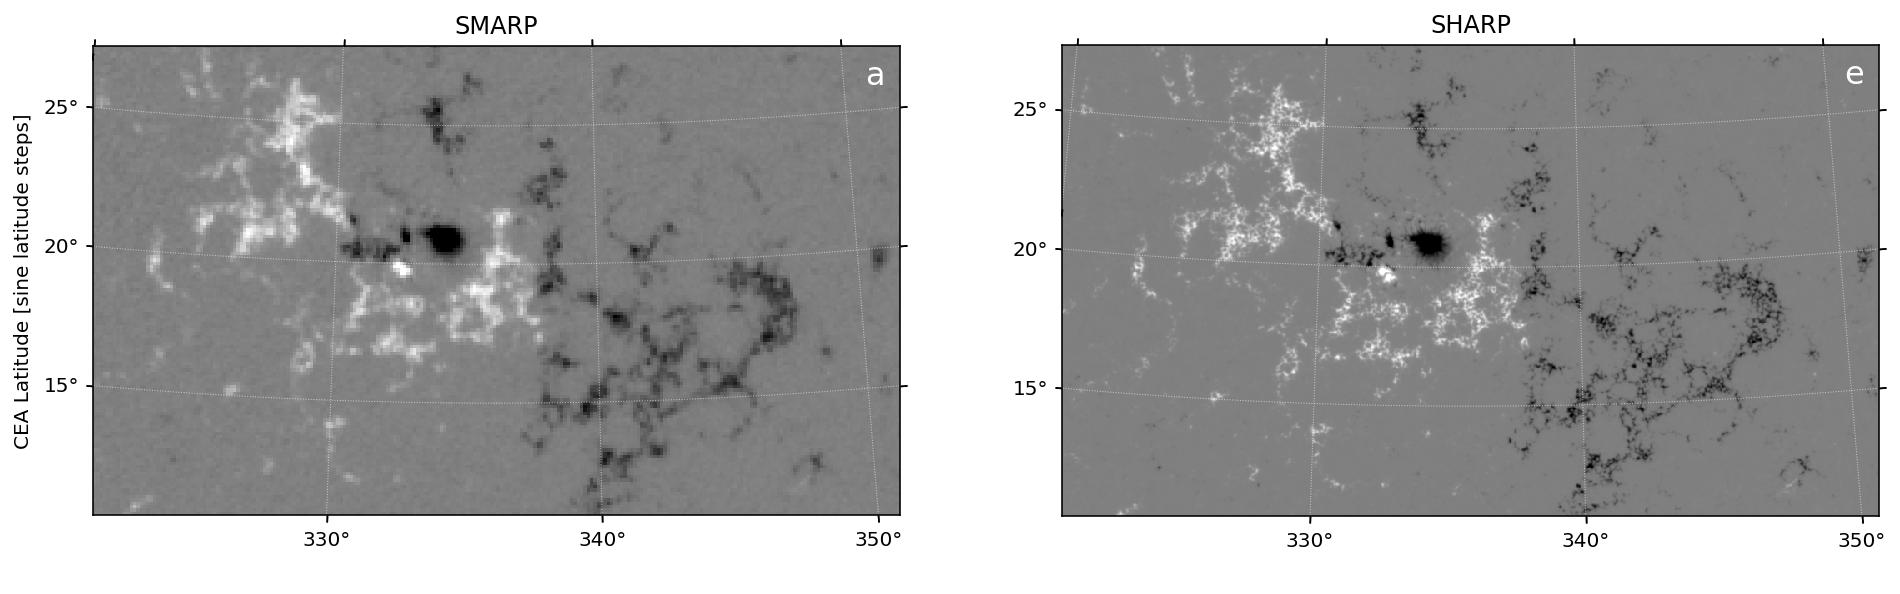

In [19]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[mdi_height.value], width_ratios=[mdi_width.value, hmi_width.value])

# MDI SMARP magnetogram
ax0 = fig.add_subplot(gs[0, 0], projection=mdi_map)
mdi_map.plot(axes=ax0, norm=colors.Normalize(vmin=-800, vmax=800), interpolation='nearest')
ax0.set_xticklabels(labels='')
ax0.set_xlabel(' ')
ax0.set_ylabel('CEA Latitude [sine latitude steps]')
ax0.annotate('a', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='white', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')
ax0.set_title('SMARP')

# HMI SHARP magnetogram
ax1 = fig.add_subplot(gs[0, 1], projection=hmi_map)
hmi_map.plot(axes=ax1, norm=colors.Normalize(vmin=-800, vmax=800), interpolation='nearest')
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')
ax1.annotate('e', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='white', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')
ax1.set_title('SHARP')

fig.savefig('Figure1a.pdf',transparency=False, bbox_inches='tight', dpi=300)

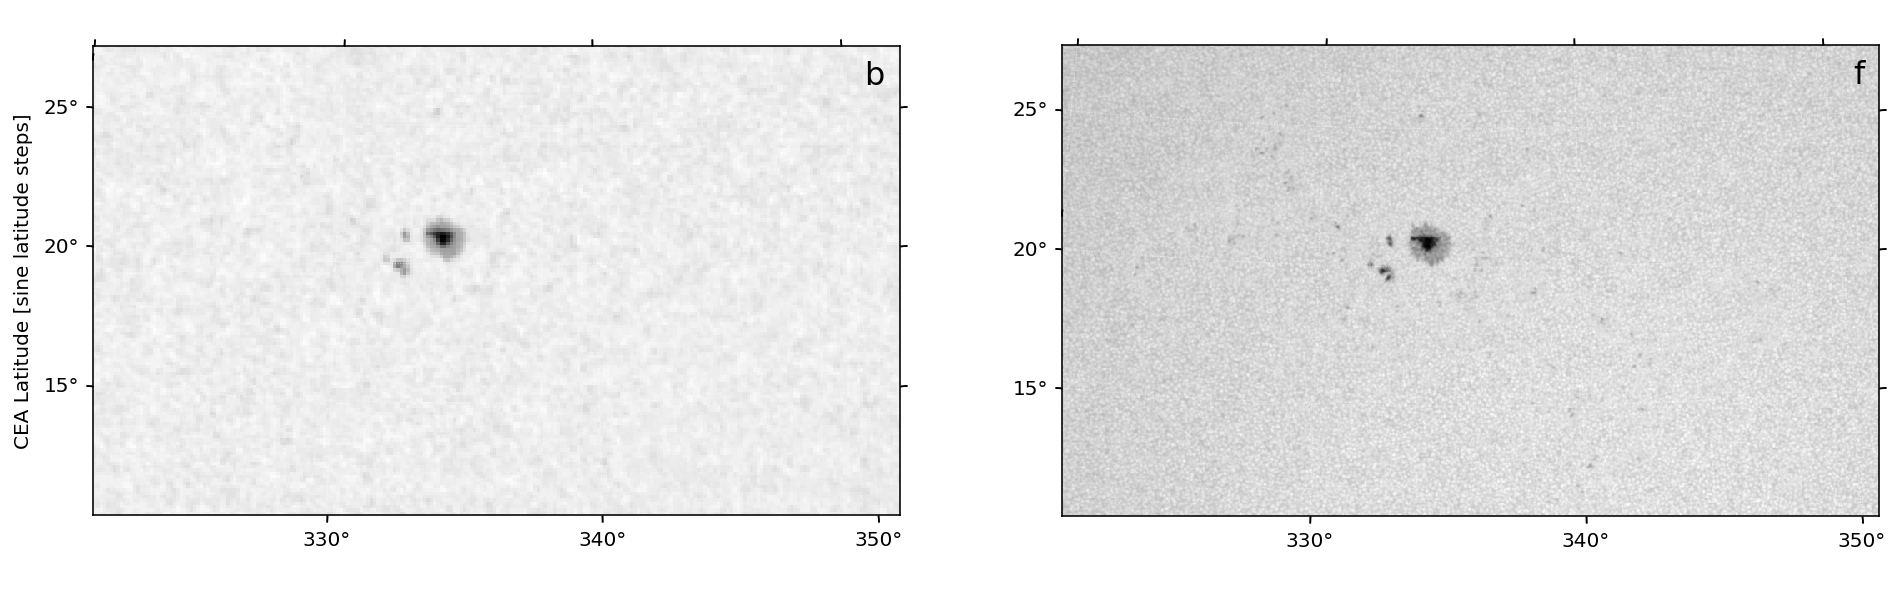

In [20]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[mdi_height.value], width_ratios=[mdi_width.value, hmi_width.value])

# MDI SMARP continuum intensity
ax0 = fig.add_subplot(gs[0, 0], projection=mdi_map)
mdi_continuum.plot(axes=ax0, norm=colors.Normalize(vmin=np.nanmin(mdi_continuum.data), vmax=np.nanmax(mdi_continuum.data)), interpolation='nearest')
ax0.set_title(' ')
ax0.set_xlabel(' ')
ax0.set_ylabel('CEA Latitude [sine latitude steps]')
ax0.annotate('b', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='black', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')


# HMI SHARP continuum intensity
ax1 = fig.add_subplot(gs[0, 1], projection=hmi_map)
hmi_continuum.plot(axes=ax1, interpolation='nearest')
ax1.set_title(' ')
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')
ax1.annotate('f', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='black', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')

fig.savefig('Figure1b.pdf',transparency=False, bbox_inches='tight', dpi=300)

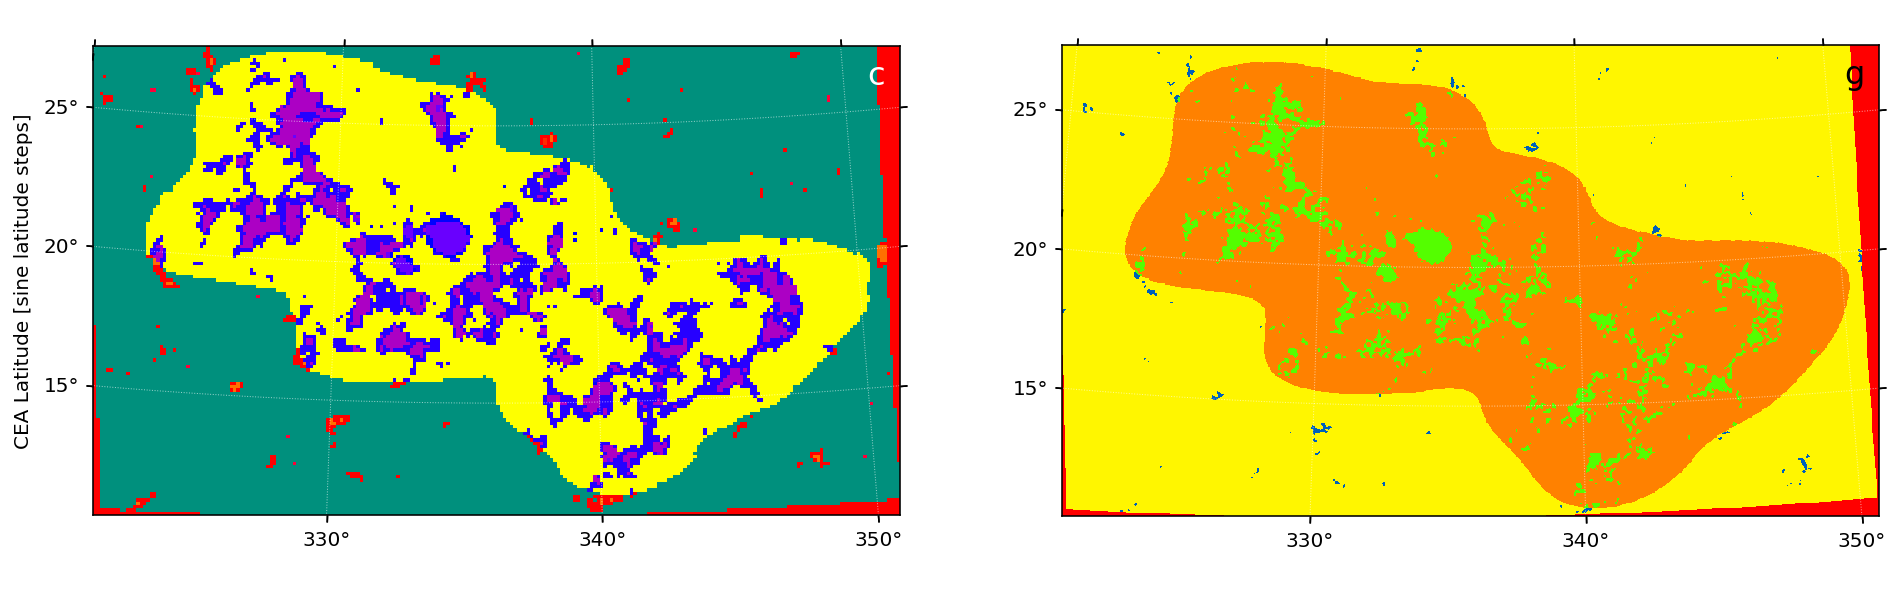

In [21]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[mdi_height.value], width_ratios=[mdi_width.value, hmi_width.value])

# MDI SMARP bitmap
ax2 = fig.add_subplot(gs[0, 0], projection=mdi_map)
mdi_bitmap.plot(axes=ax2, cmap='prism', norm=colors.Normalize(vmin=0, vmax=90), interpolation='nearest')
ax2.set_title(' ')
ax2.set_xlabel(' ')
ax2.set_ylabel('CEA Latitude [sine latitude steps]')
ax2.annotate('c', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='white', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')

# HMI SHARP bitmap
ax3 = fig.add_subplot(gs[0, 1], projection=hmi_map)
hmi_bitmap.plot(axes=ax3, cmap='prism', norm=colors.Normalize(vmin=0, vmax=34), interpolation='nearest')
ax3.set_title(' ')
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')
ax3.annotate('g', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='black', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')

fig.savefig('Figure1c.pdf',transparency=False, bbox_inches='tight', dpi=300)

In [22]:
# Identify the pixels that contribute to the SMARP keywords
mdi_bitmap.data[mdi_bitmap.data <= 36] = 0
mdi_bitmap.data[mdi_bitmap.data > 36] = 1

In [23]:
# Identify the pixels that contribute to the SHARP keywords

hmi_bitmap.data[hmi_bitmap.data <= 30] = 0
hmi_bitmap.data[hmi_bitmap.data > 30] = 1
hmi_conf_disambig.data[hmi_conf_disambig.data <=60 ] = 0
hmi_conf_disambig.data[hmi_conf_disambig.data > 60] = 1
outdata = hmi_conf_disambig.data * hmi_bitmap.data

# Create a new map
outdatamap = sunpy.map.Map(outdata, hmi_bitmap.fits_header)

In [24]:
test = outdatamap.data + hmi_bitmap.data
# Create a new map
testmap = sunpy.map.Map(test, hmi_bitmap.fits_header)

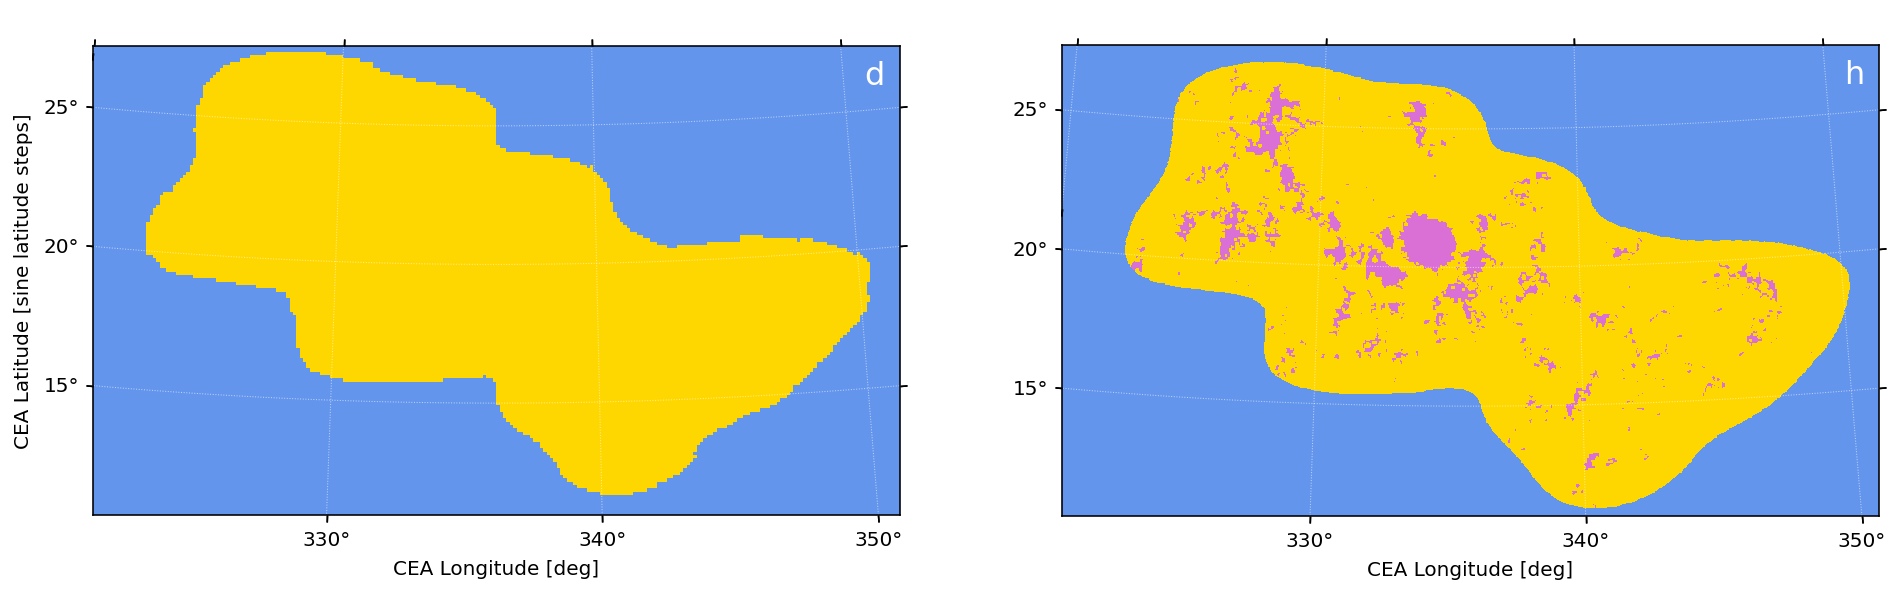

In [25]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[mdi_height.value], width_ratios=[mdi_width.value, hmi_width.value])

# MDI SMARP bitmap
ax2 = fig.add_subplot(gs[0, 0], projection=mdi_map)
mdi_bitmap.plot(axes=ax2, cmap=colors.ListedColormap(['cornflowerblue', 'gold']), norm=colors.Normalize(vmin=0, vmax=1), interpolation='nearest')
ax2.set_title(' ')
ax2.set_xlabel('CEA Longitude [deg]')
ax2.set_ylabel('CEA Latitude [sine latitude steps]')
ax2.annotate('d', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='white', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')

# HMI SHARP bitmap
ax3 = fig.add_subplot(gs[0, 1], projection=hmi_map)
testmap.plot(axes=ax3, cmap=colors.ListedColormap(['cornflowerblue', 'gold', 'orchid']), norm=colors.Normalize(vmin=0, vmax=2), interpolation='nearest')
ax3.set_title(' ')
ax3.set_xlabel('CEA Longitude [deg]')
ax3.set_ylabel(' ')
ax3.annotate('h', xy=(1, 1), xytext=(-15, -15), xycoords='axes fraction', color='white', fontsize='16',
             textcoords='offset pixels', horizontalalignment='right',verticalalignment='top')

fig.savefig('Figure1d.pdf',transparency=False, bbox_inches='tight', pad_inches=0.22, dpi=300)

Print center pixels in latitude and longitude for each map:

In [26]:
hmi_map.center.lat, hmi_map.center.lon

(<Latitude 19.53404999 deg>, <Longitude 335.82046509 deg>)

In [27]:
mdi_map.center.lat, mdi_map.center.lon

(<Latitude 19.42430115 deg>, <Longitude 336.1652832 deg>)

Print dimensions for each map:

In [28]:
print(hmi_map.dimensions[0]*hmi_map.scale[0], hmi_map.dimensions[1]*hmi_map.scale[1])

29.42999934218824 deg 16.979999620467424 deg


In [29]:
print(mdi_map.dimensions[0]*mdi_map.scale[0], mdi_map.dimensions[1]*mdi_map.scale[1])

29.03999935090542 deg 16.91999962180853 deg
